In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/good-bad/dataset2022.xlsx


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 数据预处理-基本描述 1.2

In [116]:
# 加载数据
df = pd.read_excel('/kaggle/input/good-bad/dataset2022.xlsx', index_col=[0])
print(df.shape)
df.head(5)

(20000, 50)


,member_id,loan_status,loan_amnt,issue_d,term,int_rate,installment,grade,emp_length,home_ownership,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
11435650,13367814,Fully Paid,32000,2020-01-14,36 months,0.0967,1027.60,B,3 years,MORTGAGE,...,10,6,11,2,94.4,14.3,292644,39963,37100,48756
11385707,13327865,Fully Paid,5000,2020-01-14,36 months,0.1922,183.84,D,2 years,RENT,...,12,2,7,5,100.0,66.7,41740,32010,12500,27340
11405625,13337797,Fully Paid,19750,2020-01-14,36 months,0.1398,674.82,C,< 1 year,RENT,...,16,8,19,2,100.0,40.0,143760,70229,99400,40960
11375637,13307791,Fully Paid,3500,2020-01-14,36 months,0.1353,118.83,B,10+ years,RENT,...,24,6,9,0,92.3,100.0,8000,4766,2200,0
11405664,13337837,Fully Paid,4000,2020-01-14,36 months,0.0662,122.82,A,2 years,OWN,...,5,3,19,1,100.0,0.0,116674,108141,8500,106274


In [117]:
# 查看全部变量缺失值情况
'''
emp_length                    1067
c_open_to_buy                 152
bc_util                        162
mo_sin_old_il_acct             561
mths_since_recent_bc           141
percent_bc_gt_75               169
'''
df.isnull().sum()

member_id                        0
loan_status                      0
loan_amnt                        0
issue_d                          0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                    1067
home_ownership                   0
FICO                             0
annual_inc                       0
loantoincome                     0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       5
total_acc                        0
tot_cur_bal                      0
total_rev_hi_lim                 0
acc_open_past_24mths             0
avg_cur_bal                      0
bc_open_to_buy                 152
bc_util                        162
mo_sin_old_il_acct             561
mo_sin_old_rev_tl_op

['3 years' '2 years' '< 1 year' '10+ years' '4 years' '8 years' '7 years'
 nan '5 years' '6 years' '9 years' '1 year']


<AxesSubplot:>

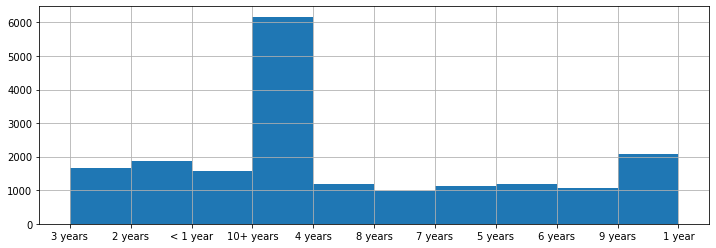

In [118]:
# 分析emp_length
print(df['emp_length'].unique())
df['emp_length'].hist(figsize=(12,4))

In [119]:
# 使用众数填充emp_length(理由众数占据的比例很明显，如果使用均值或者0值填充会比较大改变数据原始分布)
import statistics
df["emp_length"] = df["emp_length"].replace(np.NaN, statistics.mode(df["emp_length"]))

[14883.  5694. 74204. ... 59875. 10476. 20900.]


<AxesSubplot:>

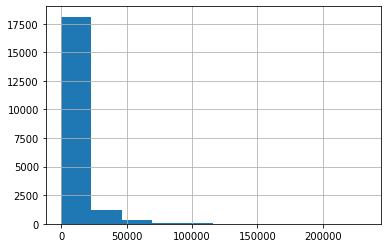

In [120]:
#分析 bc_open_to_buy
print(df['bc_open_to_buy'].unique())
df['bc_open_to_buy'].hist()

In [121]:
# 分析 bc_open_to_buy 使用中位数或者均值填充。因为数据集中分布且为连续变量
#Mean - 缺失值
df['bc_open_to_buy'] = df['bc_open_to_buy'].replace(np.NaN, df['bc_open_to_buy'].mean())

[ 59.9  54.4  25.3 ... 118.  109.8 149.1]


<AxesSubplot:>

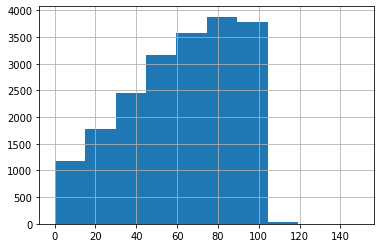

In [122]:
# 分析 bc_util 
print(df['bc_util'].unique())
df['bc_util'].hist()

In [123]:
# 填充 bc_util 使用中位数填充，数据为连续变量
df['bc_util'] = df['bc_util'].replace(np.NaN, df['bc_util'].median())

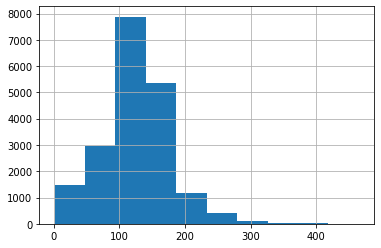

In [124]:
# mo_sin_old_il_acct
df['mo_sin_old_il_acct'].hist()
df['mo_sin_old_il_acct'] = df['mo_sin_old_il_acct'].replace(np.NaN, df['mo_sin_old_il_acct'].median())

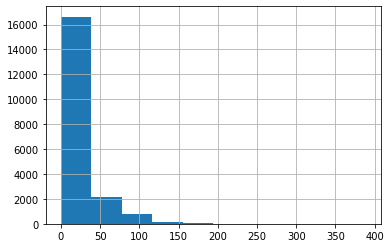

In [125]:
df['mths_since_recent_bc'].hist()
df['mths_since_recent_bc'] = df['mths_since_recent_bc'].replace(np.NaN, df['mths_since_recent_bc'].mean())

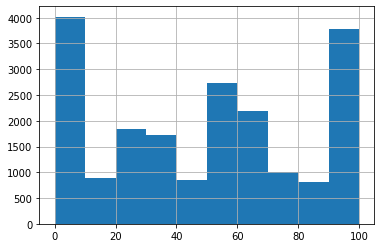

In [126]:
# percent_bc_gt_75 删除行
df['percent_bc_gt_75'].hist()
df.dropna(inplace=True)

In [127]:
# 查看缺失情况
df.isnull().sum()

member_id                     0
loan_status                   0
loan_amnt                     0
issue_d                       0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
FICO                          0
annual_inc                    0
loantoincome                  0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
mo_sin_old_il_acct            0
mo_sin_old_rev_tl_op          0
mo_sin_rcnt_rev_tl_op         0
mo_sin_rcnt_tl                0
mort_acc

## 数据预处理-多维描述1.3

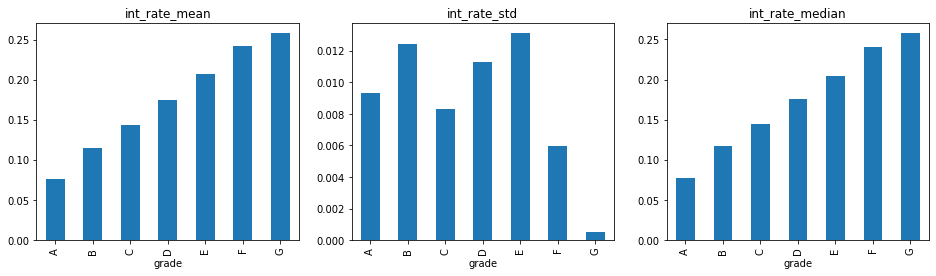

In [128]:
## 统计 FICO
def plot_fico(columns):
    fico = ['mean', 'std', 'median']
    rows = len(fico)
    cols = len(columns)
    fig = plt.figure(figsize=(16,4))
    for row in range(cols):
        for col in range(rows):
            ax1 = fig.add_subplot(cols,rows,row*rows+col+1)
            ax1.set_title('{}_{}'.format(columns[row],fico[col]))
            if col == 0:
                ax1 = df.groupby('grade')[columns[row]].mean().plot(kind='bar')
            if col == 1:
                ax1 = df.groupby('grade')[columns[row]].std().plot(kind='bar')
            if col == 2:
                ax1 = df.groupby('grade')[columns[row]].median().plot(kind='bar')
# plot_fico(['int_rate', 'loan_status', 'emp_length', 'home_ownership'])
plot_fico(['int_rate'])

<Figure size 1152x2304 with 0 Axes>

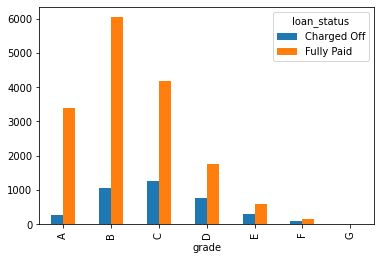

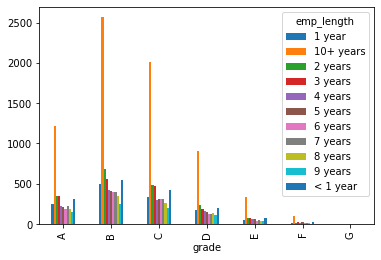

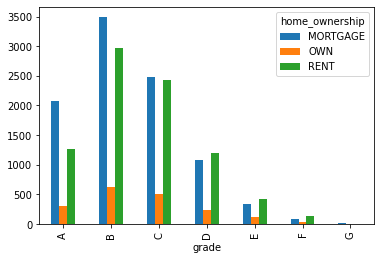

In [139]:
## 类别特征统计频数
fig = plt.figure(figsize=(16,32))
# ax1 = fig.add_subplot(3, 1, 1)
ax1.set_title('loan_status')
ax1 = df.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')
# ax2 = fig.add_subplot(3, 1, 2)
ax2.set_title('emp_length')
ax2 = df.groupby('grade')['emp_length'].value_counts().unstack().plot(kind='bar')
# ax3 = fig.add_subplot(3, 1, 3)
ax3.set_title('home_ownership')
ax3 = df.groupby('grade')['home_ownership'].value_counts().unstack().plot(kind='bar')

## 数据预处理-1.4数据变换

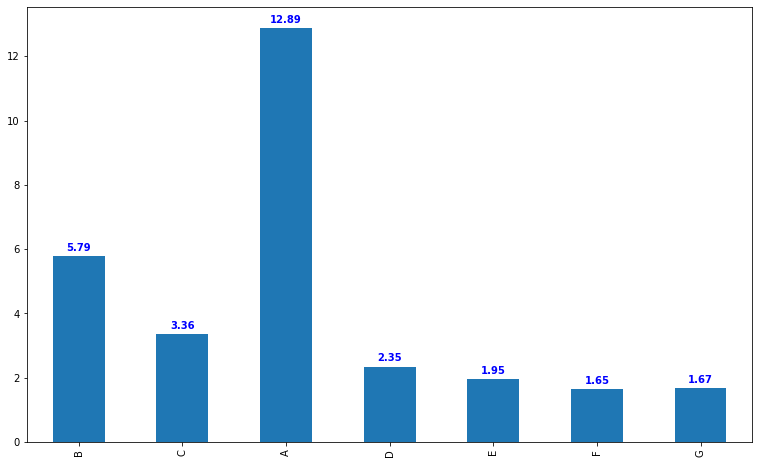

In [132]:
grade_vc = df['grade'].value_counts()
grade_ls_vc = df.groupby('grade')['loan_status'].value_counts()
grade_ls_vc = pd.DataFrame(grade_ls_vc)
grade_ls_vc.columns = ['loan_status_n']

# 求好坏比率
grade_level = pd.Series(grade_vc.index.tolist())
g_b = pd.DataFrame(index = grade_level,columns=list(['g_b','good','bad']))
for i in grade_level:
    grade_1 = grade_ls_vc.loc[(i,slice(None)),'loan_status_n']
    g_b.loc[i,'g_b'] = grade_1[0]/grade_1[1]
    g_b.loc[i,'good'] = grade_1[0]
    g_b.loc[i,'bad'] = grade_1[1]
# 绘制各分类柱状图
plt.figure(figsize=(13, 8))
g_b['g_b'].plot.bar()# one variable
for i, v in enumerate(g_b['g_b']):
    plt.text(i, v+0.1, '%.2f' % v, color='blue', fontweight='bold',ha='center', va= 'bottom',fontsize=10)

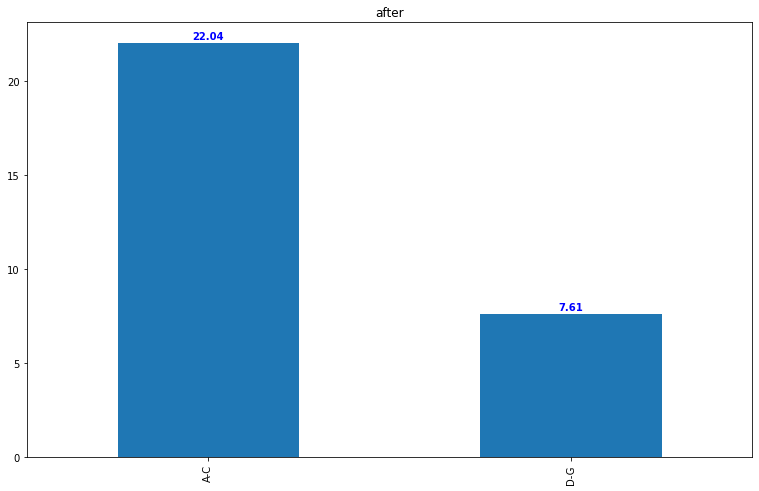

In [133]:
# 粗分类后。（A-C分为一类）（D-G分为一类）
g_b.loc['A-C'] = g_b.loc[['A','B', 'C'],:].apply(lambda x: x.sum())
g_b.loc['D-G'] = g_b.loc[['D','E','F','G'],:].apply(lambda x: x.sum())
g_b['g_b1'] = g_b['good']/g_b['bad']
g_b = g_b.drop(['A','B','C','D','E','F','G'])

plt.figure(figsize=(13, 8))
g_b['g_b'].plot.bar()# one variable
plt.title('after')
for i, v in enumerate(g_b['g_b']):
    plt.text(i, v+0.1, '%.2f' % v, color='blue', fontweight='bold',ha='center', va= 'bottom',fontsize=10)

## 数据预处理-1.5

In [94]:

# home_ownership各类别间没有比较的关系，转换成哑变量，避免比较关系
ho_ = pd.get_dummies(df['home_ownership'])
pd.merge(df, ho_, on='id')
ho_

,MORTGAGE,OWN,RENT
id,,,
11435650,1,0,0
11385707,0,0,1
11405625,0,0,1
11375637,0,0,1
11405664,0,1,0
...,...,...,...
20798851,1,0,0
20778925,1,0,0
20739103,0,1,0


In [96]:
# grade转换成递增的数字，因为数字和grade都隐含比较关系
def mapfunc(x):
    if x == 'A':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4
    if x == 'E':
        return 5
    if x == 'F':
        return 6
    if x == 'G':
        return 7
df['grade'].map(mapfunc)

id
11435650    2
11385707    4
11405625    3
11375637    2
11405664    1
           ..
20798851    1
20778925    3
20739103    2
20718887    5
20778858    1
Name: grade, Length: 19831, dtype: int64

## 数据可视化-2.1

<AxesSubplot:xlabel='int_rate'>

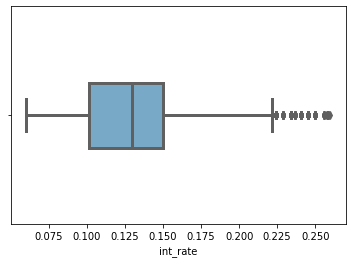

In [98]:
# int_rate箱形图
sns.boxplot(x=df['int_rate'], palette="Blues", width=0.3,linewidth=3)#Horizontal

<AxesSubplot:ylabel='Density'>

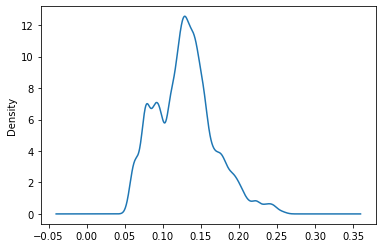

In [100]:
# int_rate概率密度图
df['int_rate'].plot.kde()

<AxesSubplot:ylabel='Density'>

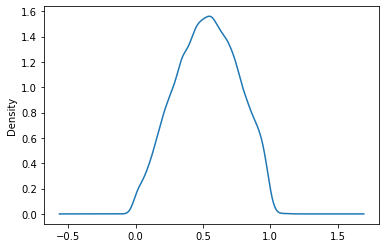

In [102]:
# revol_util的概率密度图
df['revol_util'].plot.kde()

## 数据可视化-2.2

<AxesSubplot:xlabel='grade'>

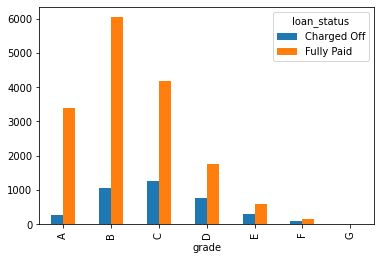

In [135]:
# 不同grade类别中的好人和坏人比例
df.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')

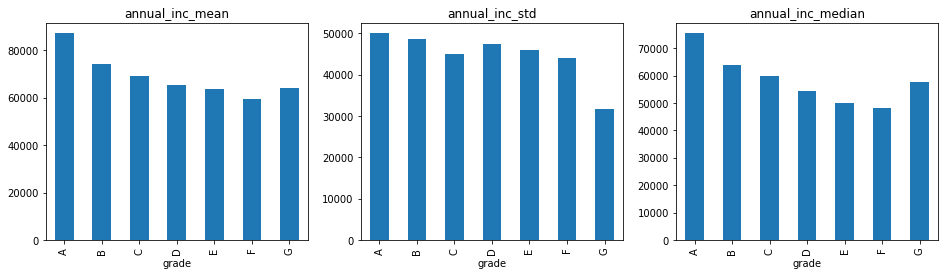

In [107]:
# 同一幅图FICO可以复用上面的代码 
## 统计 FICO
def plot_fico(columns, target):
    fico = ['mean', 'std', 'median']
    rows = len(fico)
    cols = len(columns)
    fig = plt.figure(figsize=(16,4))
    for row in range(cols):
        for col in range(rows):
            ax1 = fig.add_subplot(cols,rows,row*rows+col+1)
            ax1.set_title('{}_{}'.format(columns[row],fico[col]))
            if col == 0:
                ax1 = df.groupby(target)[columns[row]].mean().plot(kind='bar')
            if col == 1:
                ax1 = df.groupby(target)[columns[row]].std().plot(kind='bar')
            if col == 2:
                ax1 = df.groupby(target)[columns[row]].median().plot(kind='bar')
# plot_fico(['int_rate', 'loan_status', 'emp_length', 'home_ownership'])

# 传入不同的参数可以得到不同列的FICO
plot_fico(['annual_inc'], target='grade')